<a href="https://colab.research.google.com/github/veroonia/Calorie-Estimation/blob/main/Calorie_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import kagglehub
import os, glob, random
import matplotlib.pyplot as plt
import cv2
import random

In [4]:
path = kagglehub.dataset_download("trolukovich/food11-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.08G/1.08G [00:16<00:00, 71.2MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1


In [7]:
DATASET_PATH = path

def list_dirs(p):
    return sorted([d for d in os.listdir(p) if os.path.isdir(os.path.join(p, d))])

# Food-11 usually has: training / validation / evaluation
splits = [s for s in ["training", "validation", "evaluation"] if os.path.isdir(os.path.join(DATASET_PATH, s))]
print("Splits found:", splits)

# Choose a split to start with (training is best)
SPLIT = "training" if "training" in splits else splits[0]
split_dir = os.path.join(DATASET_PATH, SPLIT)

classes = list_dirs(split_dir)
print("Number of classes:", len(classes))
print("Class folders:", classes)

# Count images per class
counts = {}
for c in classes:
    c_dir = os.path.join(split_dir, c)
    imgs = glob.glob(os.path.join(c_dir, "*.jpg")) + glob.glob(os.path.join(c_dir, "*.png")) + glob.glob(os.path.join(c_dir, "*.jpeg"))
    counts[c] = len(imgs)

print(f"\nImage counts in '{SPLIT}':")
for c in classes:
    print(f"  {c}: {counts[c]}")

# Collect all image paths in this split (for later sampling/preview)
all_image_paths = glob.glob(os.path.join(split_dir, "*", "*.*"))
print("\nTotal images found in split:", len(all_image_paths))


Splits found: ['training', 'validation', 'evaluation']
Number of classes: 11
Class folders: ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']

Image counts in 'training':
  Bread: 994
  Dairy product: 429
  Dessert: 1500
  Egg: 986
  Fried food: 848
  Meat: 1325
  Noodles-Pasta: 440
  Rice: 280
  Seafood: 855
  Soup: 1500
  Vegetable-Fruit: 709

Total images found in split: 9866


A balanced visual inspection was performed to verify class diversity and image quality before applying image processing techniques.

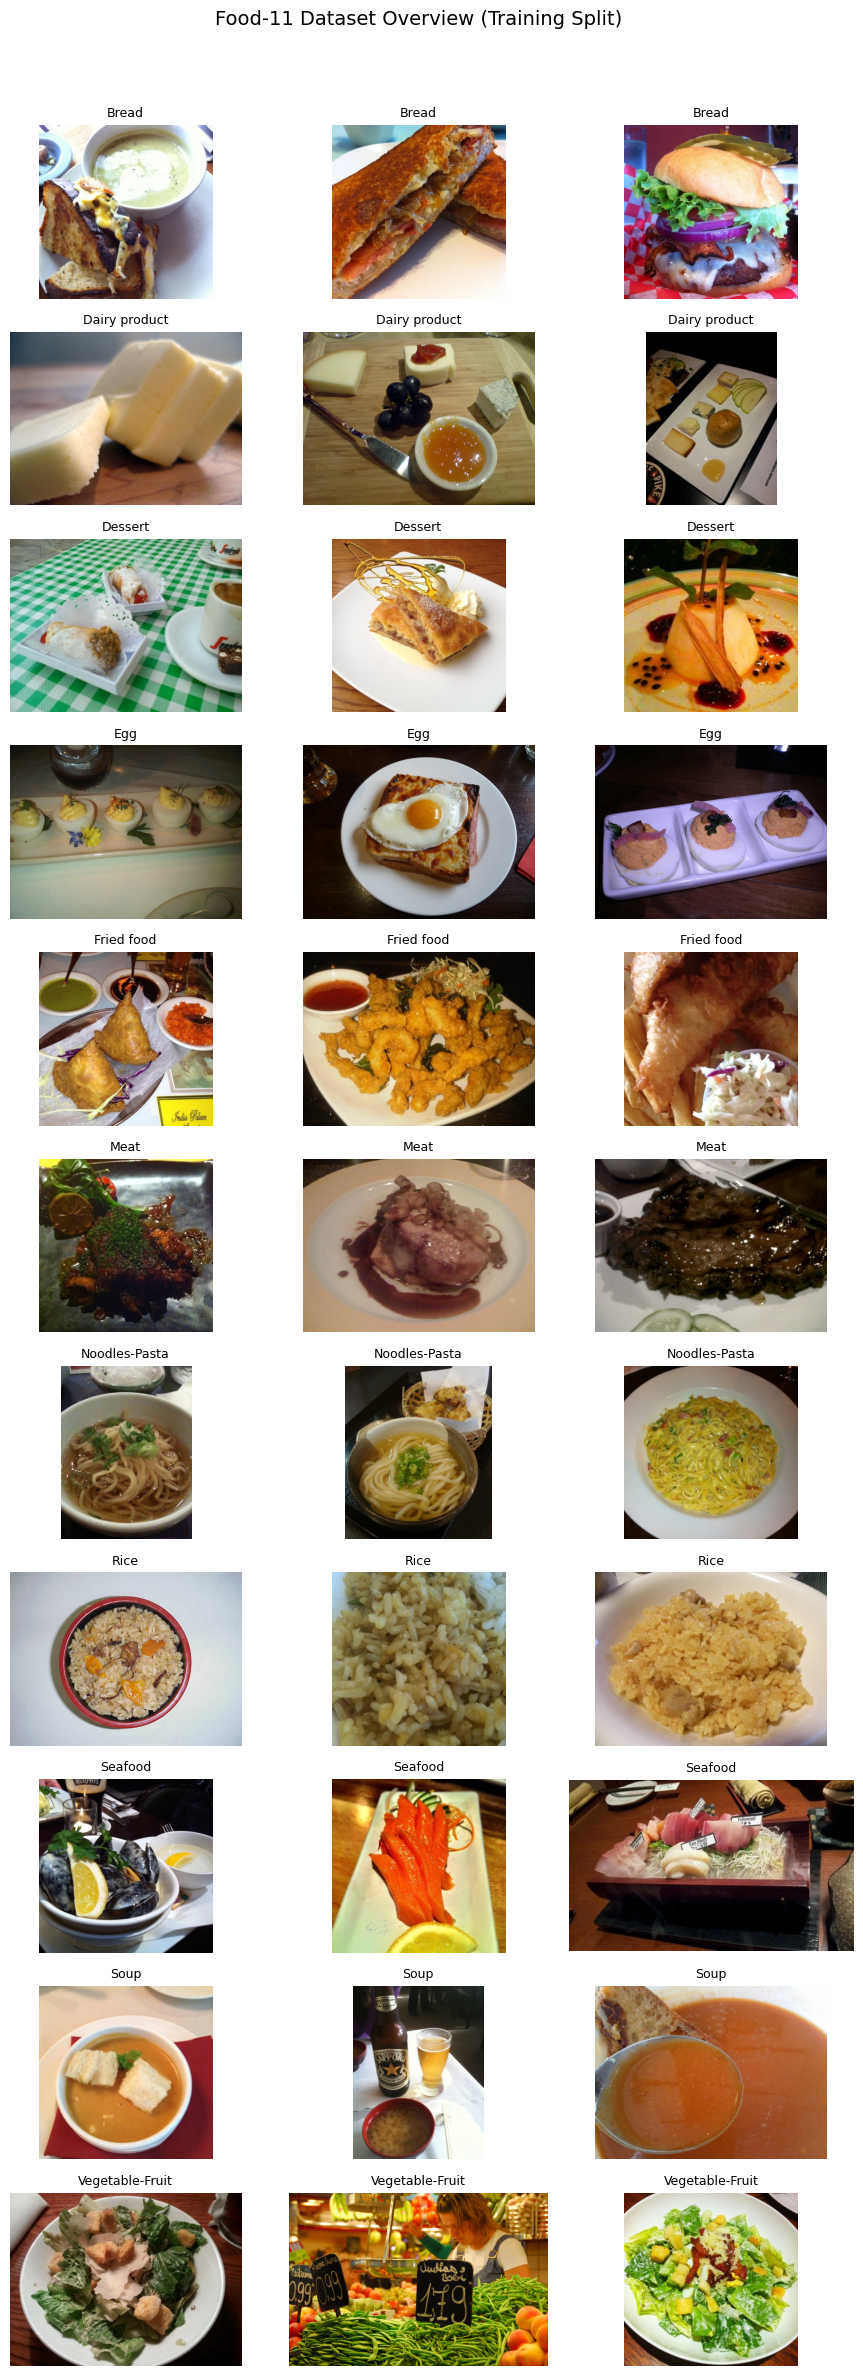

In [10]:
def show_balanced_grid(split_dir, classes, k_per_class=3):
    images = []
    titles = []

    for cls in classes:
        cls_dir = os.path.join(split_dir, cls)
        img_paths = glob.glob(os.path.join(cls_dir, "*.*"))
        selected = random.sample(img_paths, k=min(k_per_class, len(img_paths)))

        for p in selected:
            img = cv2.imread(p)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            titles.append(cls)

    cols = k_per_class
    rows = len(classes)

    plt.figure(figsize=(cols * 3, rows * 2.2))
    idx = 1
    for img, title in zip(images, titles):
        plt.subplot(rows, cols, idx)
        plt.imshow(img)
        plt.title(title, fontsize=9)
        plt.axis("off")
        idx += 1

    plt.suptitle("Food-11 Dataset Overview (Training Split)", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

show_balanced_grid(split_dir, classes, k_per_class=3)